In [43]:
import pandas as pd

df = pd.read_csv('train.txt', error_bad_lines=False, names = ["id", "l1", "l2", "l3", "label"])

df['comment_text'] = df['l1'] + ' ' + df['l2'] + ' ' + df['l3']
list(df)
# print(df.shape)
# df = pd.DataFrame({'label': ['others', 'angry', 'happy','sad']})
# pd.get_dummies(df, prefix=[''])
df = pd.concat([df,pd.get_dummies(pd.DataFrame({'label': ['others', 'angry', 'happy','sad']}), prefix='label')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['label'],axis=1, inplace=True)
df.head()
df.rename(columns={'label_angry': 'angry',
                   'label_happy': 'happy',
                   'label_others': 'others',
                   'label_sad': 'sad'}, inplace=True)
df.drop(["l1", "l2", "l3", ], axis=1, inplace=True)
train = df
train.head()

,id,comment_text,angry,happy,others,sad
0,0,Don't worry I'm girl hmm how do I know if you ...,0.0,0.0,1.0,0.0
1,1,When did I? saw many times i think -_- No. I n...,1.0,0.0,0.0,0.0
2,2,By by Google Chrome Where you live,0.0,1.0,0.0,0.0
3,3,U r ridiculous I might be ridiculous but I am ...,0.0,0.0,0.0,1.0
4,4,Just for time pass wt do u do 4 a living then ...,NaN,NaN,NaN,NaN


In [44]:
df = pd.read_csv('test.txt', error_bad_lines=False, names = ["id", "l1", "l2", "l3"])

df['comment_text'] = df['l1'] + ' ' + df['l2'] + ' ' + df['l3']
list(df)
df.head()
# print(df.shape)
# df = pd.DataFrame({'label': ['others', 'angry', 'happy','sad']})
# pd.get_dummies(df, prefix=[''])
# df = pd.concat([df,pd.get_dummies(pd.DataFrame({'label': ['others', 'angry', 'happy','sad']}), prefix='label')],axis=1)

# # now drop the original 'country' column (you don't need it anymore)
# df.drop(['label'],axis=1, inplace=True)
# # df.head()
# df.rename(columns={'label_angry': 'angry',
#                    'label_happy': 'happy',
#                    'label_others': 'others',
#                    'label_sad': 'sad'}, inplace=True)
# df.drop(["l1", "l2", "l3", ], axis=1, inplace=True)
test = df
test.head()

,id,l1,l2,l3,comment_text
0,0,Then dont ask me,YOURE A GUY NOT AS IF YOU WOULD UNDERSTAND,IM NOT A GUY FUCK OFF,Then dont ask me YOURE A GUY NOT AS IF YOU WOU...
1,1,Mixed things such as??,the things you do.,Have you seen minions??,Mixed things such as?? the things you do. Have...
2,2,Today I'm very happy,and I'm happy for you ❤,I will be marry,Today I'm very happy and I'm happy for you ❤ I...
3,3,Woah bring me some,left it there oops,Brb,Woah bring me some left it there oops Brb
4,4,it is thooooo,I said soon master.,he is pressuring me,it is thooooo I said soon master. he is pressu...


In [80]:
train.isnull().any()
test.isnull().any()

id              False
l1              False
l2              False
l3               True
comment_text    False
dtype: bool

In [81]:
train.fillna(method='ffill')
test.fillna(method='ffill')

,id,l1,l2,l3,comment_text
0,0,Then dont ask me,YOURE A GUY NOT AS IF YOU WOULD UNDERSTAND,IM NOT A GUY FUCK OFF,Then dont ask me YOURE A GUY NOT AS IF YOU WOU...
1,1,Mixed things such as??,the things you do.,Have you seen minions??,Mixed things such as?? the things you do. Have...
2,2,Today I'm very happy,and I'm happy for you ❤,I will be marry,Today I'm very happy and I'm happy for you ❤ I...
3,3,Woah bring me some,left it there oops,Brb,Woah bring me some left it there oops Brb
4,4,it is thooooo,I said soon master.,he is pressuring me,it is thooooo I said soon master. he is pressu...
5,5,Wont u ask my age??,hey at least I age well!,Can u tell me how can we get closer??,Wont u ask my age?? hey at least I age well! C...
6,6,I said yes,What if I told you I'm not?,Go to hell,I said yes What if I told you I'm not? Go to hell
7,7,Where I ll check,why tomorrow?,No I want now,Where I ll check why tomorrow? No I want now
8,8,Shall we meet,you say- you're leaving soon...anywhere you wa...,?,Shall we meet you say- you're leaving soon...a...
9,9,Let's change the subject,I just did it .l.,You're broken,Let's change the subject I just did it .l. You...


## Introduction

This kernel shows how to use NBSVM (Naive Bayes - Support Vector Machine) to create a strong baseline for the [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) competition. NBSVM was introduced by Sida Wang and Chris Manning in the paper [Baselines and Bigrams: Simple, Good Sentiment and Topic Classiﬁcation](https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf). In this kernel, we use sklearn's logistic regression, rather than SVM, although in practice the two are nearly identical (sklearn uses the liblinear library behind the scenes).

If you're not familiar with naive bayes and bag of words matrices, I've made a preview available of one of fast.ai's upcoming *Practical Machine Learning* course videos, which introduces this topic. Here is a link to the section of the video which discusses this: [Naive Bayes video](https://youtu.be/37sFIak42Sc?t=3745).

In [82]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [100]:
# train = pd.read_csv('../input/train.csv')
# test = pd.read_csv('../input/test.csv')
# subm = pd.read_csv('../input/sample_submission.csv')

## Looking at the data

The training data contains a row per comment, with an id, the text of the comment, and 6 different labels that we'll try to predict.

In [84]:
train.head()

,id,comment_text,angry,happy,others,sad,none
0,0,Don't worry I'm girl hmm how do I know if you ...,0.0,0.0,1.0,0.0,0.0
1,1,When did I? saw many times i think -_- No. I n...,1.0,0.0,0.0,0.0,0.0
2,2,By by Google Chrome Where you live,0.0,1.0,0.0,0.0,0.0
3,3,U r ridiculous I might be ridiculous but I am ...,0.0,0.0,0.0,1.0,0.0
4,4,Just for time pass wt do u do 4 a living then ...,NaN,NaN,NaN,NaN,NaN


Here's a couple of examples of comments, one toxic, and one with no labels.

In [85]:
train['comment_text'][0]

"Don't worry I'm girl hmm how do I know if you are What's ur name?"

In [86]:
train['comment_text'][2]

'By by Google Chrome Where you live'

The length of the comments varies a lot.

In [87]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(63.68562834224599, 29.949246270824357, 687)

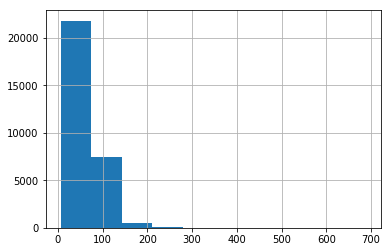

In [88]:
lens.hist();

We'll create a list of all the labels to predict, and we'll also create a 'none' label so we can see how many comments have no labels. We can then summarize the dataset.

In [89]:
label_cols = ['others', 'angry', 'happy','sad']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,id,angry,happy,others,sad,none
count,29920.000000,4.00,4.00,4.00,4.00,4.0
mean,15093.326036,0.25,0.25,0.25,0.25,0.0
std,8683.737157,0.50,0.50,0.50,0.50,0.0
min,0.000000,0.00,0.00,0.00,0.00,0.0
25%,7628.750000,0.00,0.00,0.00,0.00,0.0
50%,15108.500000,0.00,0.00,0.00,0.00,0.0
75%,22588.250000,0.25,0.25,0.25,0.25,0.0
max,30159.000000,1.00,1.00,1.00,1.00,0.0


In [90]:
len(train),len(test)

(29920, 2755)

There are a few empty comments that we need to get rid of, otherwise sklearn will complain.

In [91]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

## Building the model

We'll start by creating a *bag of words* representation, as a *term document matrix*. We'll use ngrams, as suggested in the NBSVM paper.

In [92]:
import re, string
re_tok = re.compile('([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

It turns out that using TF-IDF gives even better priors than the binarized features used in the paper. I don't think this has been mentioned in any paper before, but it improves leaderboard score from 0.59 to 0.55.

In [93]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train[COMMENT])
test_term_doc = vec.transform(test[COMMENT])

`

In [94]:
trn_term_doc, test_term_doc

(<29920x7934 sparse matrix of type '<class 'numpy.float64'>'
 	with 1512441 stored elements in Compressed Sparse Row format>,
 <2755x7934 sparse matrix of type '<class 'numpy.float64'>'
 	with 135755 stored elements in Compressed Sparse Row format>)

Here's the basic naive bayes feature equation:

In [95]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [96]:
x = trn_term_doc
test_x = test_term_doc



Fit a model for one dependent at a time:

In [97]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [98]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit others


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

And finally, create the submission file.

In [99]:
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('submission.csv', index=False)

NameError: name 'subm' is not defined